<a href="https://colab.research.google.com/github/kimheeseo/2022_AI_SW_Programmingstudy/blob/main/practice_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
# libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# read data
df = pd.read_csv('data05_boston.csv')

In [42]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [43]:
df.info()#506개의 sample 존재

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


# **simple linear regression**
참고사이트 : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [44]:
from sklearn.linear_model import LinearRegression

X = df[ ['lstat'] ]
y = df['medv']

In [45]:
X #변수 하나에 대한 값을 출력하고 있다.

,lstat
0,4.98
1,9.14
2,4.03
3,2.94
4,5.33
...,...
501,9.67
502,9.08
503,5.64
504,6.48


In [46]:
lm = LinearRegression()#함수처럼 보이지만, class이다, lm이 object이다.
lm.fit(X,y) #LinearRegression을 하려고 사용한다.
#model ~ beta0+beta1*X=y

LinearRegression()

In [47]:
lm.intercept_ # intercepter, 절편

34.5538408793831

In [48]:
lm.coef_  # coefficients, 기울기

array([-0.95004935])

In [49]:
yhat = lm.predict(X) # prediction, 새로운 값으로 결과값 예측하고 싶을 때 사용

In [50]:
lm.predict([[10]])#x값이 10일 때의 결과값 예측한 경우.

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([25.05334734])

In [51]:
yhat #앞서 언급한 실제 결과값인 y값에 대한 예측한 값들의 모음

array([29.8225951 , 25.87038979, 30.72514198, 31.76069578, 29.49007782,
       29.60408375, 22.74472741, 16.36039575,  6.11886372, 18.30799693,
       15.1253316 , 21.94668596, 19.62856553, 26.70643322, 24.80633451,
       26.50692285, 28.30251613, 20.61661686, 23.44776393, 23.83728417,
       14.58380346, 21.41465832, 16.76891698, 15.66685973, 19.06803641,
       18.86852605, 20.48360995, 18.13698805, 22.39320915, 23.17224962,
       13.08272548, 22.16519731,  8.22797329, 17.12043524, 15.22983702,
       25.35736314, 23.71377775, 26.22190805, 24.92984093, 30.44962767,
       32.67274316, 29.95560201, 29.03405413, 27.48547369, 25.48086955,
       24.85383698, 21.11064252, 16.69291303,  5.28282029, 19.16304135,
       21.77567707, 25.59487547, 29.53758029, 26.54492483, 20.49311044,
       29.98410349, 29.07205611, 30.80114593, 28.03650231, 25.79438584,
       22.06069188, 20.83512821, 28.16000873, 25.52837202, 26.90594358,
       30.1171104 , 24.8253355 , 26.85844111, 22.11769484, 26.20

In [52]:
r2 = lm.score(X,y) # R2

In [53]:
r2

0.5441462975864797

In [54]:
rmse = np.sqrt(((y-yhat)**2).mean())

In [55]:
rmse

6.203464131426422

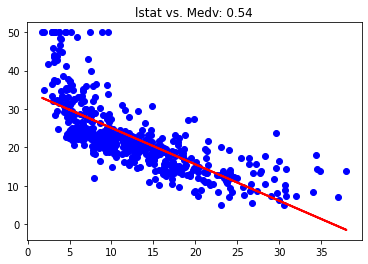

In [56]:
plt.plot(X,y,'bo')
plt.plot(X,yhat,'r',linewidth=2)
plt.title('%s vs. Medv: %.2f' % ('lstat',r2))
plt.show()

# **multiple linear regression**

In [57]:
X = df.iloc[:,0:13]
y = df['medv']

In [58]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [59]:
X #x값의 종류 13개가 출력된 것을 확인 가능, X = df.iloc[:,0:13]에 의해서.

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [60]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [61]:
lm = LinearRegression()#lm이라는 object생성
lm.fit(X,y)

LinearRegression()

In [62]:
lm.coef_  # coefficients, 13개의 coefficients값이 출력된다.

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [63]:
lm.intercept_ # intercepter

36.45948838508978

In [64]:
yhat = lm.predict(X) # prediction
r2 = lm.score(X,y) # R2
rmse = np.sqrt(((y-yhat)**2).mean())

In [65]:
rmse

4.679191295697282

In [66]:
r2

0.7406426641094095

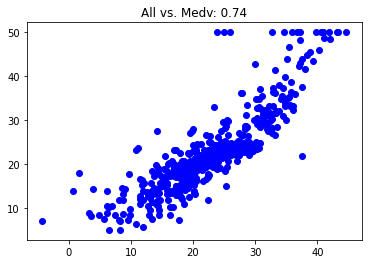

In [67]:
plt.plot(yhat,y,'bo')
plt.title('All vs. Medv: %.2f' % r2)
plt.show()
#회귀 평가지표인 MAE, MSE, RMSE, MSLE, RMSLE는 값이 작을수록 R²는 값이 클수록
#회귀 성능이 좋은 것으로 해석된다. 값이 작을수록 예측값과 실제값의 차이가 없다는 뜻이기 때문이다.

#지금까지 한 것은 기계학습에서 바라본 linear regression. 통계적 분석을 위해서는 Stats Model 사용

# **using StatsModel**

In [68]:
import statsmodels.api as sm
X = df.iloc[:,0:13]
X = sm.add_constant(X)
y = df['medv']
f = sm.OLS(y,X)
r = f.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [69]:
f

In [70]:
r.summary()
#사이킷런보다 다양한 data를 제공해준다. (통계적인 여러가지 값에 대한 정보제공)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          6.72e-135
Time:                        06:10:10   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zn             0.0464      0.014      3.382      0.001       0.019       0.073
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
chas           2.6867      0.862      3.118      0.002       0.994       4.380
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
rm             3.8099      0.418      9.116      0.000       2.989       4.631
age            0.0007      0.013      0.052      0.958      -0.025       0.027
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
rad            0.3060      0.066      4.613      0.000       0.176       0.436
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
black          0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
print(r.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          6.72e-135
Time:                        06:10:10   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

In [72]:

yhat = r.predict(X)
np.sqrt( ((yhat-y)**2).mean() )

# training vs. test set
X = df.iloc[:,0:13]
y = df['medv']
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.5,random_state=0) 

lm = LinearRegression()
lm.fit(xtrain,ytrain)

yhat_train = lm.predict(xtrain)
rmse_train = np.sqrt( ((ytrain-yhat_train)**2).mean() )
r2_train = lm.score(xtrain,ytrain)
print(rmse_train,r2_train)

yhat_test = lm.predict(xtest)
rmse_test = np.sqrt( ((ytest-yhat_test)**2).mean() )
r2_test = lm.score(xtest,ytest)
print(rmse_test,r2_test)



4.430389222526522 0.7877808902724839
5.030075721681159 0.6662719929919436
